### Predicting Survival in the Titanic Data Set 
 
##### We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. 
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import graphviz # should install
import pydotplus # should install
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image,display  
from sklearn import metrics
from sklearn import datasets,tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.describe()
#titanic.describe().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.size

10692

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

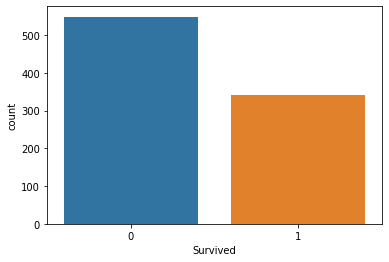

In [8]:
sns.countplot(titanic['Survived'])

In [9]:
print("null error rate",format(titanic["Survived"].mean() * 100, "2f"), '%')
print('the overll probability of survival is less')

null error rate 38.383838 %
the overll probability of survival is less


In [10]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
print('Probability of survival is high for 1st class passengers (63%) compared to those in 2nd class (47%) and 3rd class (24%)')

Probability of survival is high for 1st class passengers (63%) compared to those in 2nd class (47%) and 3rd class (24%)


In [12]:
class_sex_grouping = titanic.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

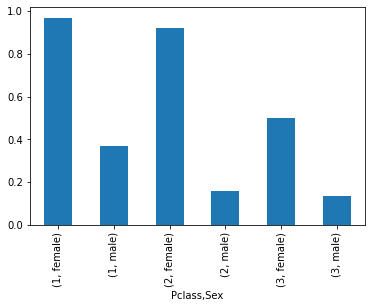

In [13]:
class_sex_grouping['Survived'].plot.bar()
plt.show()
                   

In [14]:
print('females are likely to survive more in each class')

females are likely to survive more in each class


In [15]:
# Data preparation
# we use only Pclass,sex,age, SibSp(Siblings abroad), Parch (Parents?children abroad), and Fare to predict whether
# a passenger survived.
titanic= titanic[['Pclass', 'Survived', 'Sex', 'Age', 'SibSp','Parch', 'Fare']]

In [16]:
titanic.isnull()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False


In [17]:
titanic.dtypes

Pclass        int64
Survived      int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [18]:
titanic.isnull().any()

Pclass      False
Survived    False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
dtype: bool

In [19]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
# Substitute NANs in age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [21]:
# Counting the passengers on basis of gender
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:

titanic['Sex'] = titanic['Sex'].map({'female':0,'male':1}).astype(int)
titanic

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,3,0,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,3,1,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,3,0,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,2,0,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,3,0,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [23]:
# The columns that we will be making predictions with
X=titanic[['Pclass','Sex', 'Age','SibSp','Parch','Fare']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [24]:

# The column that we will be making predictions on
y = titanic['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [25]:
### Split data randomly into 70% training and 30% test ###
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:

model = LogisticRegression()
model = model.fit(X_train, y_train)

# check the accuracy on the training set
model.score(X_train, y_train)

0.7881219903691814

In [27]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
predicted= model2.predict(X_test)
print('Accuracy for test data set;',format(metrics.accuracy_score(y_test,predicted) *  100,'.2f'),'%')


Accuracy for test data set; 80.97 %


In [29]:
param_test1 ={  'max_depth':range(2,5),
                'min_samples_split':[2,3,5],
                'min_samples_leaf':[1,2,3]
                   }

grid_result = GridSearchCV(DecisionTreeClassifier(),param_grid=param_test1,cv=10, n_jobs=-1, verbose=1)
grid_result.fit(X_train,y_train)


print("Best:  %f  using  %s " % (grid_result.best_score_, grid_result.best_params_))                                                          




Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s


Best:  0.820276  using  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} 


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    4.0s finished


In [30]:
predicted= grid_result.predict(X_test)
print('Accuracy for test data set;',format(metrics.accuracy_score(y_test,predicted) *  100,'.2f'),'%')


Accuracy for test data set; 82.46 %


In [31]:
dot_data = tree.export_graphviz(grid_result.best_estimator_,out_file=None,filled=True, rounded=True,
                                  feature_names=['Pclass','Sex', 'Age','SibSp','Parch','Fare'],
                                    class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [32]:
display(Image(graph.create_png())) # it was installation error

InvocationException: GraphViz's executables not found

In [33]:
# now lets predict the chances of a 3 years old child

grid_result.predict_proba(np.array([[2,1,3,0,2,0.0]]))

array([[0.05882353, 0.94117647]])

In [34]:
print("probabliy of child survivng is 94%")

probabliy of child survivng is 94%
